<a href="https://colab.research.google.com/github/mdazlaanzubair/Noob2Neural/blob/main/The_DI_DE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTORUDCTION**

### **The DI DE**

 The **DI**gits **DE**tector is a simple project that uses a neural network to classify the handwritten digits. In this project their were **TWO NEURAL NETWORKS** are formed.

 In the first neural network there is only **2x layered** architecture will be used i.e. **INPUT LAYER** and **OUTPUT LAYER**. While in the second neural network the same architecture will be followed along with an additional **HIDDEN LAYER** in order to test the performance and improvement if the model.

# **STEP 1 - IMPORT AND INSTALL REQUISITE LIBRARIES**

Following are the dependencies or libraries being used to create the said neural network:

*   **TensorFlow** - An open-source software library for machine learning and artificial intelligence. It can be used to develop models for various tasks, including natural language processing, image recognition, handwriting recognition, and different computational-based simulations such as partial differential equations.

*   **Keras** - A high-level API of the TensorFlow platform. It provides an approachable, highly-productive interface for solving machine learning (ML) problems, with a focus on modern deep learning.

*   **Matplotlib** - A comprehensive library for creating static, animated, and interactive visualizations in Python. It create publication quality plots. Make interactive figures that can zoom, pan, update.

*   **Numpy** - It is used to perform a wide variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.

*   **Tabulate** - It is a module that display data in a tabulated form.

*   **Seaborn** - It is a data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [33]:
# IMPORTING NECESSARY LIBRARIES
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as ploter
%matplotlib inline
import numpy as np
from tabulate import tabulate
import seaborn as sn

# **STEP 2 - LOAD THE DATASET**

Before creating a model a collection of data is required that is used to train and test algorithms and models. For the purpose of **The DiDe** a dataset of **MNIST** will be used.

**MNIST Dataset** - Modified National Institute of Standards and Technology is a large collection of handwritten digits, ranging from **0** to **9**. It is a very popular dataset in the field of image processing. It is often used for benchmarking machine learning algorithms.

The dataset is being loaded using **KERAS**:

*   **x_train** - Hold the features of training data which in this case is a **TWO-DIMENSION** array of an image grid holding **RGB** values of each pixel of the image.

*   **y_train** - Holds the label of corresponding image in **x_train** which in this case the **DIGIT** in the image.

*   Similarly, for **x_test** and **y_test**, the word **TRAIN** and **TEST** represents which dataset is for training and which one is for testing.

Y Train Label => 5
X Train Feature => AxesImage(size=(28, 28))


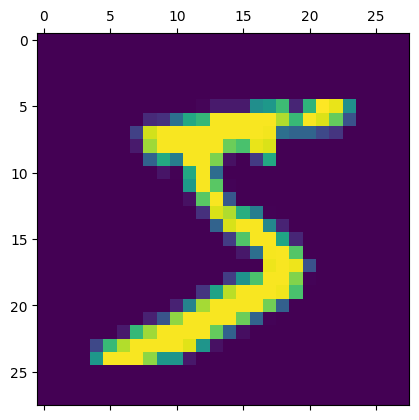

In [34]:
# LOADING MNIST DATASET USING KERAS
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# SINCE THE MODEL IS SHOWING POOR ACCURACY THEREFORE THE DATASET WILL BE
# RE-SCALED TO GET OPTIMAL RESULTS - IN THIS CASE THE SCALE WILL RANGE
# BETWEEN 0 TO 1 - FOR THAT ALL THE RGB VALUES IN THE DATASET WILL BE
# DIVIDED BY 255
x_train = X_train / 255
x_test = X_test / 255

# PREVIEWING OUR LOADED DATA USING MATPLOT LIBRARY
print("Y Train Label =>", y_train[0])
print("X Train Feature =>", ploter.matshow(x_train[0]))

# **STEP 3 - FLATTEN THE DATA**

As discussed in the **STEP 2**, the dataset contains a **TWO-DIMENSION** array of an image grid holding RGB values of each pixel of the image. Which is difficult and complex for performing operation specially when using large data.

Therefore, the concept of flattening takes place where the **TWO-DIMENSION** array will be converted into **ONE-DIMENSION** array by reshaping the dataset object.

In [35]:
# AFTER PRINTING OUT THE CURRENT SHAPE DATASET OBJECT IT IS REVEALED THAT
# THE FIRST VALUE OF OBJECT REPRESENTS THE NUMBER OF DATA, THE SECOND AND THIRD
# VALUES REPRESENTS ACTUAL TWO-DIMENSION ARRAY OF A 2D IMAGE

# "x_train" HAS 60000 IMAGES AND EACH IMAGE IS A SET IF 28 x 28 GRID
# TWO-DIMENSIONAL ARRAY, SAME IS FOR "x_test"

print("x_train =>", x_train.shape)
print("x_test =>", x_test.shape)


print("\n===================================\n")

# THE DATA IS NOW RESHAPED FROM TWO-DIMENSIONAL TO ONE-DIMENSIONAL ARRAY
# WHICH MAKES IT EASIER TO PERFORM MATHEMATICAL CALCULATION / OPERATIONS

# 2D TO 1D CONVERSION IS BEING DONE BY "numpy" RE-SHAPE FUNCTION
x_train_flattened = x_train.reshape(len(x_train), 28 * 28)
x_test_flattened = x_test.reshape(len(x_test), 28 * 28)

# AFTER RESHAPING THE "x_train" STILL HAS 60000 IMAGES BUT THIS TIME THE IMAGE
# IS A ONE-DIMENSIONAL ARRAY, SAME IS FOR "x_test"

print("x_train_flattened =>", x_train_flattened.shape)
print("x_test_flattened =>", x_test_flattened.shape)

x_train => (60000, 28, 28)
x_test => (10000, 28, 28)


x_train_flattened => (60000, 784)
x_test_flattened => (10000, 784)


# **STEP 4 - CREATE A NEURAL NETWORK**

After loading and flattening the data now is the time to create a **SEQUENTIAL NEURAL NETWORK** using **KERAS**.

*   **SEQUENTIAL** - It is a model constructor that connects neurons in a sequence network, where neurons are arranged in layers, passing information forward. It accepts two parameters as follows:

    *   **name** - It take a name of a model.

    *   **layers** - It take a list of layers to be incorporated in the model.

*   **layers.Dense** - It represents that the layers of the model are "densely connected", where each neuron is connected to all neurons in the previous layer. It accepts four parameters as follows:
    
    * **units** *(required)* - This is the most crucial parameter, specifying the number of neurons in the Dense layer. The number of neurons determines the layer's capacity to extract features and learn patterns from the data.
    
    * **activation** *(optional)* - An activation function applied to the outputs of each neuron. Common choices include "relu" for non-linearity, "sigmoid" for probability-like outputs, and others.
    
    * **input_shape** *(optional)* - The expected shape of the input data the layer will receive. This is essential for the first layer when you need to specify the input format (e.g., (28, 28, 1) for 28x28 grayscale images).
    
    * **kernel_initializer and bias_initializer** *(optional)* - Methods to initialize the weights and biases of the layer, influencing how the layer starts learning.

In [36]:
# MAKING INITIAL MODEL THAT CONSIST OF ONLY TWO LAYERS AND THOSE
# ARE "INPUT", AND "OUTPUT" USING KERAS SEQUENTIAL CONSTRUCTOR

# "units" - MNIST DATASET HAS 10 DIGITS (0 TO 9) THEREFORE UNITS WILL BE "10"
# ALL THESE NEURONS TRYING TO LEARN THE FEATURES TO DISTINGUISH BETWEEN DIGITS

# "activation" - IN THIS CASE "Sigmoid" IS THE ACTIVATION FUNCTION
# IT WILL OUTPUT VALUE BETWEEN 0 AND 1

# INITIALIZING THE MODEL
mdl = keras.Sequential(name="Two_Layered_DiDe")

# ADDING LAYER TO IT
mdl.add(keras.layers.Dense(units=10, input_shape=(784,), activation="sigmoid"))

# PRITNING OUT THE SUMMARY OF THE CREATED MODEL
mdl.summary()

Model: "Two_Layered_DiDe"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **STEP 5 - TRAIN THE MODEL**

After creation of **Two_Layered_DiDe**, it is time provide some training data to help model to learn features of the handwritten digits. But before that there is another crucial step called **COMPILE**. It transforms the simple sequence of layers defined in **STEP 4** into a highly efficient series of matrix transformations that makes it possible for the computer to train the model.

This **compile()** function takes three parameters as follows:

*   **loss** - It measures the difference between the model's predictions and the actual labels, guiding the learning process by minimizing this difference.

*   **optimizer** - It iteratively updates the model's weights and biases based on the calculated loss. It determines how the model learns from its mistakes and improves its predictions.

*   **metrics** - This specifies the metrics you want to track during training and evaluation. These metrics give insights into the model's performance on aspects beyond just the loss function.

In [37]:
# WHILE COMPILATION OF THE MODEL FOLLOWING CONFIGURATIONS ARE BEING USED

# "loss" - "sparse_categorical_crossentropy" LOSS FUNCTION IS APPROPRIATE FOR
# MULTI-CLASS CLASSIFICATION TASKS WHERE LABELS ARE PROVIDED AS INTEGERS
# REPRESENTING THE CLASS CATEGORY (E.G., DIGIT RECOGNITION).

# "optimizer" - "adam" IS A POPULAR AND EFFICIENT OPTIMIZER CHOICE FOR VARIOUS
# TASKS. DIFFERENT OPTIMIZERS LIKE "SGD" OR "RMSPROP" HAVE SPECIFIC STRENGTHS
# AND WEAKNESSES DEPENDING ON THE PROBLEM.

# "metrics" - "accuracy" IS A COMMON METRIC FOR CLASSIFICATION TASKS, MEASURING
# THE PERCENTAGE OF CORRECT PREDICTIONS. OTHER METRICS LIKE "precision",
# "recall", OR "F1-score" COULD BE USED DEPENDING ON THE PROBLEM'S FOCUS.

# MODEL IS BEING COMPILED AFTER AFOREMENTIONED CONFIGURATIONS
mdl.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# AFTER COMPILATION, THE MODEL IS TRAINED ON A FLATTENED TRAINING DATASET
# WHERE:
# "x_train_flattened" - IS FLATTENED TRAINING DATA (FEATURES)
# "y_train" - IS CORRESPONDING LABEL OF TRAINING DATA (FEATURES)
# "epochs" - IS THE NUMBER OF TIME THE MODEL RUNS THROUGH ENTIRE TRAINING DATA
# "batch_size" - IS THE NUMBER OF SAMPLES TO BE PROCESSED IN EACH STEP

mdl.fit(x_train_flattened, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4692 - accuracy: 0.8791
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9147
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9254
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2615 - accuracy: 0.9271
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9276
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2550 - accuracy: 0.9292
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2528 - accuracy: 0.9310
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.251

# **STEP 6 - EVALUATE THE ACCURACY**

After the training now its time to test the accuracy on a traoining dataset.

In [48]:
# USING "evaluate()" FUNCTION THE ACCURACY OF THE MODEL WILL BE TESTED
# ON THE UNSEEN DATA

loss, accuracy = mdl.evaluate(x_test_flattened, y_test)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2632 - accuracy: 0.9282
Test loss: 0.2632339298725128
Test accuracy: 0.9282000064849854


# **STEP 7 - TEST PREDICTION**

After getting the accuracy the prediction of the model will be tested

FOLLOWING ARE THE ACTUAL VALUES OF 90 NUMBER IMAGE FROM THE TEST DATASET

Label for Image Number 90 => 3

 AxesImage(size=(28, 28))


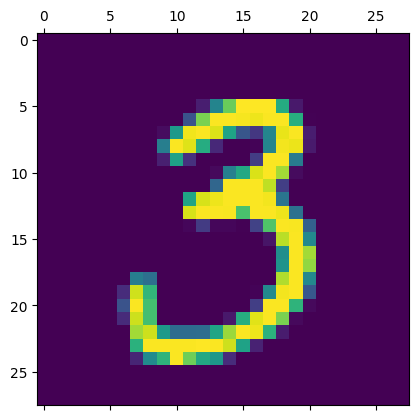

In [39]:
# PRINTING OUT ONE IMAGE FROM TEST DATATSET OF 10000 IMAGES
print("========================================================================")
print("FOLLOWING ARE THE ACTUAL VALUES OF 90 NUMBER IMAGE FROM THE TEST DATASET")
print("========================================================================\n")
print("Label for Image Number 90 =>", y_test[90])
print("\n", ploter.matshow(x_test[90]))

In [40]:
# A PREDICTION WILL BE DONE BY JUST PASSING 90 NUMBER IMAGE FROM THE
# FLATTENED DATASET TO VERIFY THE RESULTS AS ABOVE
predictions = mdl.predict(x_test_flattened)

# SINCE THE PREDICTION IS DONE NOW EXTRACTING ONLY SINGLE-ONE FOR VERIFICATION
# WHICH IS IMAGE NUMBER 90
prediction = predictions[90]

# INITIALIZING TABLE WITH COLUMNS
table = [["S#", "DIGIT", "CONFIDENCE"]]

# SINCE THE MODEL HAS 10 UNITS IN OUTPUT LAYER THEREFORE EACH PREDICTION
# 10 RESULTS WITH THE ACCURACY / CONFIDENCE LEVEL THEREFORE FOLLOWING LOOP
# IS BEING RUN THROUGH EACH OF THE 10 RESULTS AND APPENDING IT TABLE ROW
for i, confidence in enumerate(prediction):
  table.append([i + 1, i, confidence])

# PRINTING THE TABLE
print(tabulate(table, tablefmt="grid"))

# THE MAXIMUM VALUE WILL REPRESENT THE MOST ACCURATE PREDICTION IT WILL BE
# EXTRACTED BY NUMPY "argmax()" FUNCTION
print("\nTHE MODEL SHOW MORE CONFIDENCE ON:", np.argmax(prediction))

313/313 [==============================] - 1s 2ms/step
+----+-------+-----------------------+
| S# | DIGIT | CONFIDENCE            |
+----+-------+-----------------------+
| 1  | 0     | 0.052611418068408966  |
+----+-------+-----------------------+
| 2  | 1     | 0.0011422765674069524 |
+----+-------+-----------------------+
| 3  | 2     | 0.03469828888773918   |
+----+-------+-----------------------+
| 4  | 3     | 0.9988593459129333    |
+----+-------+-----------------------+
| 5  | 4     | 0.0001079239445971325 |
+----+-------+-----------------------+
| 6  | 5     | 0.6800702810287476    |
+----+-------+-----------------------+
| 7  | 6     | 5.309327644198447e-09 |
+----+-------+-----------------------+
| 8  | 7     | 0.014608632773160934  |
+----+-------+-----------------------+
| 9  | 8     | 0.31976914405822754   |
+----+-------+-----------------------+
| 10 | 9     | 0.05560935661196709   |
+----+-------+-----------------------+

THE MODEL SHOW MORE CONFIDENCE ON: 3


# **STEP 8 - PERFORMANCE MATRIX**

To calculate the performance of the model a confusion matrix will be made to test and evaluate the **ERRORS** and **ACCURACY** in predicting digits.

Text(0.5, 1.0, 'Confusion Matrix')

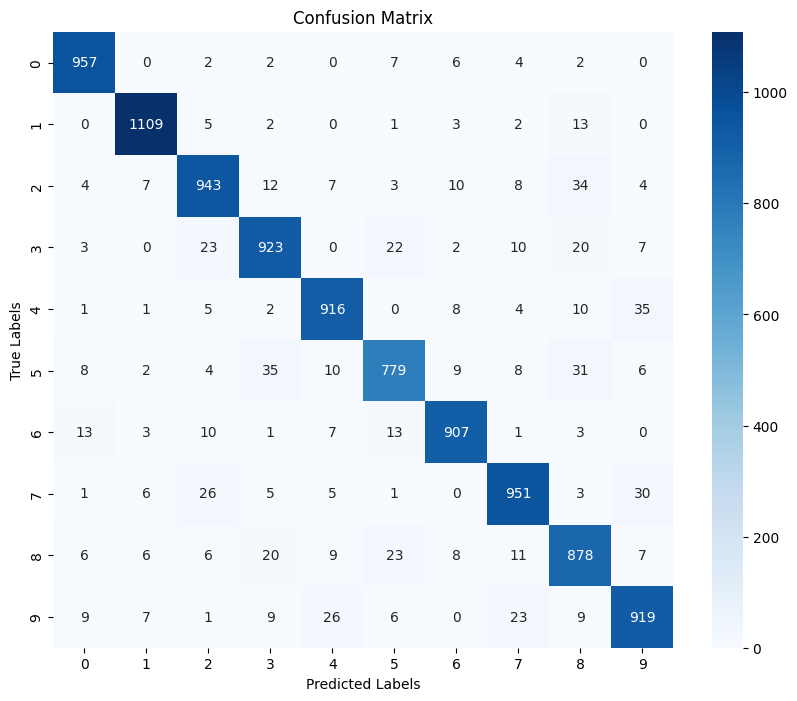

In [44]:
# SINCE WE HAVE 10 CLASS (O TO 9) THEREFORE THE MODEL PREDICTS
# THE LIKELIHOOD RANGING FROM O TO 1 USING "Sigmoid Function" WHICH
# REPRESENTS THE PROBABLITIES FOR EACH CLASS

# TO COMPUTE THE CONFUSION MATRIX, DISCRETE CLASS IS REQUIRED THEREFORE
# ALL THE PROBABILITIES VECTORS WILL BE CONVERTED INTO DISCRETE CLASS LABELS

# "argmax()" FUNCTION WILL GET THE MAXIMUM VALUE / HIGH PROBABLITY VECTOR FROM
# SPECIFIED AXIS FOR EACH PREDICTION AND THE PREDICTION ARRAY CONVERTED INTO
# SINGLE DISCRETE CLASS LABLE ARRAY
single_label_array = np.argmax(predictions, axis=1)

# USING TENSORFLOW CONFUSION MATRIX FOR THE PURPOSE
cm = tf.math.confusion_matrix(labels=y_test, predictions=single_label_array)

# IN ORDER TO BEAUTIFY PLOTTING the MATRIX USING SEABORN LIBRARY
ploter.figure(figsize=(10, 8))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ploter.xlabel('Predicted Labels')
ploter.ylabel('True Labels')
ploter.title('Confusion Matrix')

# **REPEATING FROM STEP 4**

After **CREATING**, **TESTING**, and **EVALUATING** the **2x layered** architecture of **The Di De** model. Now its time to add a **HIDDEN LAYER** in order to test the performance and improvement if the model.

In [45]:
# INITIALIZING THE MODEL
model = keras.Sequential(name="Three_Layered_DiDe")

# ADDING HIDDEN LAYER TO IT
model.add(keras.layers.Dense(units=100, input_shape=(784,), activation="relu"))

# OUTPUT LAYER
model.add(keras.layers.Dense(units=10, activation="sigmoid"))

# MODEL IS BEING COMPILED ON SAME CONFIGURATIONS AS IN STEP 5
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# MODEL IS BEING TRAINED AS IN STEP 5
model.fit(x_train_flattened, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2708 - accuracy: 0.9233
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1218 - accuracy: 0.9642
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0870 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0651 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0515 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0422 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0340 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0281 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0246 - accuracy: 0.9920
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.020

In [49]:
# EVALUATING PERFORMANCE ON TEST DATASET AS IN STEP 6
loss, accuracy = mdl.evaluate(x_test_flattened, y_test)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2632 - accuracy: 0.9282
Test loss: 0.2632339298725128
Test accuracy: 0.9282000064849854


313/313 [==============================] - 1s 3ms/step


Text(0.5, 1.0, 'Confusion Matrix')

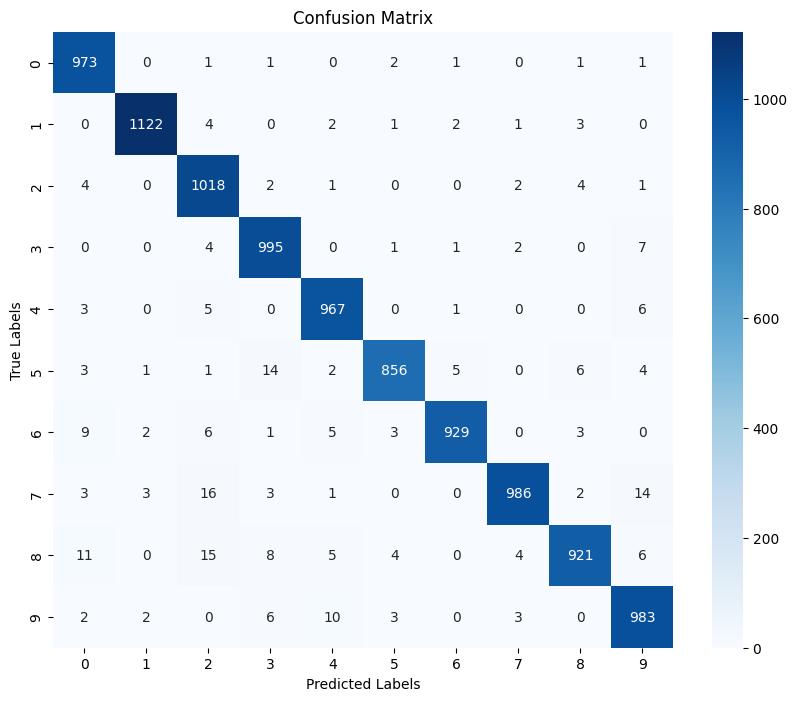

In [47]:
# DOING PREDICTIONS AS IN STEP 7
predictions = model.predict(x_test_flattened)

# COMPUTING CONFUSION MATRIX AS IN STEP 8
single_label_array = np.argmax(predictions, axis=1)

# USING TENSORFLOW CONFUSION MATRIX FOR THE PURPOSE
cm = tf.math.confusion_matrix(labels=y_test, predictions=single_label_array)

# PLOTTING MATRIX USING SEABORN LIBRARY
ploter.figure(figsize=(10, 8))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ploter.xlabel('Predicted Labels')
ploter.ylabel('True Labels')
ploter.title('Confusion Matrix')

# **CONCLUSION**

An experiment has been conduted where a **NEURAL NETWORK** has been made to detect the handwritten numbers.

Initially the model is create by using a simple **2x layered** architecture. And, the data was directly exposed to the model without scaling which caused a lot of errors while predicting. However, then the data is scaled between 0 to 1 in order to minimize the error occurance. After normalization the following results are observed:

* **Test Loss** - 26%
* **Test Accuracy** - 93%

After successful testing and evaluation a **HIDDEN LAYER** is added to the existing model which does not show any furher improvement in the model accuracy but definitly decrease the errors as per the computed **CONFUSION MATRIX**.

